In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.metrics import confusion_matrix, classification_report,roc_auc_score,roc_curve

In [9]:
final=pd.read_csv('merged_df.csv')

In [3]:
final.head()

,customer_id,recency_score,frequency_score,monetary_score,rfm_score,segment,customer_unique_id,recency,frequency,monetary_value,customer_tenure,late_deliveries,num_orders,review_score
0,9ef432eb6251297304e76186b10a928d,2,1.0,1.0,4.0,Regular,7c396fd4830fd04220f754e42b4e5bff,335.0,4.0,82.0,27.0,0,2.0,4
1,9ef432eb6251297304e76186b10a928d,2,1.0,1.0,4.0,Regular,7c396fd4830fd04220f754e42b4e5bff,335.0,4.0,82.0,27.0,0,2.0,4
2,9ef432eb6251297304e76186b10a928d,2,1.0,1.0,4.0,Regular,7c396fd4830fd04220f754e42b4e5bff,335.0,4.0,82.0,27.0,0,2.0,4
3,9ef432eb6251297304e76186b10a928d,2,1.0,1.0,4.0,Regular,7c396fd4830fd04220f754e42b4e5bff,335.0,4.0,82.0,27.0,0,2.0,4
4,9ef432eb6251297304e76186b10a928d,2,1.0,1.0,4.0,Regular,7c396fd4830fd04220f754e42b4e5bff,335.0,4.0,82.0,27.0,0,2.0,4


In [10]:
df = pd.read_csv('clv_data.csv')

C:\Temp\ipykernel_7628\1792979554.py:1: DtypeWarning: Columns (13,15,18,22,25,26,27,28,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('clv_data.csv')


In [5]:
df.head()

,product_category_name,seller_id,product_id,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,...,seller_city,seller_state,product_category_name_english,Unnamed: 32,recency,frequency,monetary_value,customer_tenure,late_deliveries,num_orders
0,utilidades_domesticas,3504c0cb71d7fa48d967e0e4c94d59d9,87285b34884572647811a353c7ac498a,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10T21:25:13.000Z,2017-10-18T00:00:00.000Z,1.0,...,maua,SP,housewares,NaN,335,4.0,82.0,27.0,0,2.0
1,utilidades_domesticas,3504c0cb71d7fa48d967e0e4c94d59d9,87285b34884572647811a353c7ac498a,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10T21:25:13.000Z,2017-10-18T00:00:00.000Z,1.0,...,maua,SP,housewares,NaN,335,4.0,82.0,27.0,0,2.0
2,utilidades_domesticas,3504c0cb71d7fa48d967e0e4c94d59d9,87285b34884572647811a353c7ac498a,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10T21:25:13.000Z,2017-10-18T00:00:00.000Z,1.0,...,maua,SP,housewares,NaN,335,4.0,82.0,27.0,0,2.0
3,perfumaria,289cdb325fb7e7f891c38608bf9e0962,595fac2a385ac33a80bd5114aec74eb8,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07T15:27:45.000Z,2018-08-13T00:00:00.000Z,1.0,...,belo horizonte,SP,perfumery,NaN,40,1.0,141.0,0.0,0,1.0
4,automotivo,4869f7a5dfa277a7dca6462dcf3b52b2,aa4383b373c6aca5d8797843e5594415,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17T18:06:29.000Z,2018-09-04T00:00:00.000Z,1.0,...,guariba,SP,auto,NaN,26,1.0,179.0,0.0,0,1.0


In [11]:
df = df[['price','freight_value','payment_type','payment_installments','customer_state','customer_id']]

In [12]:
# Performing the merge
final_df = pd.merge(final, df, on='customer_id', how='inner')

In [13]:
final_df.head()

,customer_id,recency_score,frequency_score,monetary_score,rfm_score,segment,customer_unique_id,recency,frequency,monetary_value,customer_tenure,late_deliveries,num_orders,review_score,price,freight_value,payment_type,payment_installments,customer_state
0,9ef432eb6251297304e76186b10a928d,2,1.0,1.0,4.0,Regular,7c396fd4830fd04220f754e42b4e5bff,335.0,4.0,82.0,27.0,0,2.0,4,29.99,8,voucher,1,SP
1,9ef432eb6251297304e76186b10a928d,2,1.0,1.0,4.0,Regular,7c396fd4830fd04220f754e42b4e5bff,335.0,4.0,82.0,27.0,0,2.0,4,29.99,8,voucher,1,SP
2,9ef432eb6251297304e76186b10a928d,2,1.0,1.0,4.0,Regular,7c396fd4830fd04220f754e42b4e5bff,335.0,4.0,82.0,27.0,0,2.0,4,29.99,8,credit_card,1,SP
3,9ef432eb6251297304e76186b10a928d,2,1.0,1.0,4.0,Regular,7c396fd4830fd04220f754e42b4e5bff,335.0,4.0,82.0,27.0,0,2.0,4,29.99,8,voucher,1,SP
4,9ef432eb6251297304e76186b10a928d,2,1.0,1.0,4.0,Regular,7c396fd4830fd04220f754e42b4e5bff,335.0,4.0,82.0,27.0,0,2.0,4,29.99,8,voucher,1,SP


In [14]:
final_df.drop(columns=['customer_unique_id'],inplace=True)

In [15]:
churn_threshold_days = 180
final_df['churn'] = (final_df['recency'] > churn_threshold_days).astype(int).astype(str)


In [16]:
final_df.shape

(945503, 19)

In [22]:
final_df.isna().sum()

customer_id             0
recency_score           0
frequency_score         0
monetary_score          0
rfm_score               0
recency                 0
frequency               0
monetary_value          0
customer_tenure         0
late_deliveries         0
num_orders              0
review_score            0
price                   0
freight_value           0
payment_type            0
payment_installments    0
customer_state          0
churn                   0
dtype: int64

In [18]:
final_df.drop(columns=['segment'],inplace=True)

In [21]:
final_df.dropna(inplace=True)

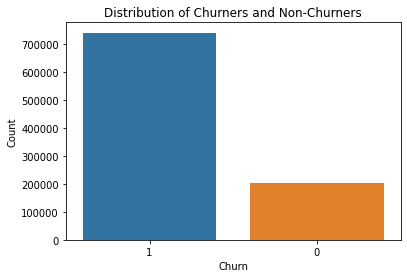

In [23]:
# Visualize the churn segmentation
sns.countplot(x='churn', data=final_df)
plt.title('Distribution of Churners and Non-Churners')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()


In [24]:
final_df['churn'].value_counts(normalize=True)*100

1    78.399177
0    21.600823
Name: churn, dtype: float64

In [27]:
from imblearn.over_sampling import SMOTE

In [38]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 945501 entries, 0 to 945502
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   customer_id           945501 non-null  object 
 1   recency_score         945501 non-null  int64  
 2   frequency_score       945501 non-null  float64
 3   monetary_score        945501 non-null  float64
 4   rfm_score             945501 non-null  float64
 5   recency               945501 non-null  float64
 6   frequency             945501 non-null  float64
 7   monetary_value        945501 non-null  float64
 8   customer_tenure       945501 non-null  float64
 9   late_deliveries       945501 non-null  int64  
 10  num_orders            945501 non-null  float64
 11  review_score          945501 non-null  int64  
 12  price                 945501 non-null  float64
 13  freight_value         945501 non-null  int64  
 14  payment_type          945501 non-null  object 
 15  

In [30]:
# One-hot encoding for categorical variables
df= pd.get_dummies(final_df, columns=['payment_type', 'payment_installments', 'customer_state'], drop_first=True)

In [31]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns
numerical_columns = ['recency_score', 'frequency_score', 'monetary_score', 'rfm_score', 'recency', 'frequency', 'monetary_value', 'customer_tenure', 'late_deliveries', 'num_orders', 'review_score', 'price', 'freight_value']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [33]:
# Convert relevant columns to appropriate types
df['recency_score'] = df['recency_score'].astype(int)
df['frequency_score'] = df['frequency_score'].astype(float)
df['monetary_score'] = df['monetary_score'].astype(float)
df['late_deliveries'] = df['late_deliveries'].astype(int)
df['review_score'] = df['review_score'].astype(int)
df['freight_value'] = df['freight_value'].astype(int)
df['churn'] = df['churn'].astype(int)  

In [36]:
df.drop(columns=['customer_id'],inplace=True)

In [42]:
df.drop(columns=['recency','recency_score'],inplace=True)

In [43]:
# Assuming final_df is your dataframe
from sklearn.model_selection import train_test_split

X = df.drop('churn', axis=1)  # Features
y = df['churn']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)



In [44]:
X_train_res.shape

(1185646, 102)

In [45]:
# Train a Random Forest classifier on the resampled data
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_res, y_train_res)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 40231    428]
 [  1244 147198]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     40659
           1       1.00      0.99      0.99    148442

    accuracy                           0.99    189101
   macro avg       0.98      0.99      0.99    189101
weighted avg       0.99      0.99      0.99    189101



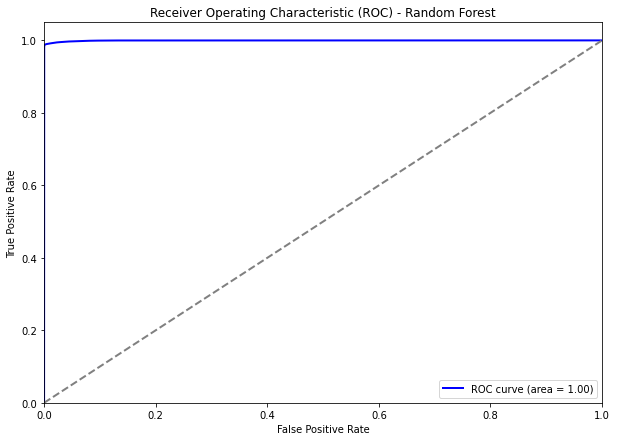

In [47]:

# Plot ROC Curve and calculate AUC
y_pred_prob_rf = clf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_prob_rf)

plt.figure(figsize=(10, 7))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Random Forest')
plt.legend(loc="lower right")
plt.show()

In [49]:
# Make predictions on the test set
y_pred_rf = clf.predict(X_test)

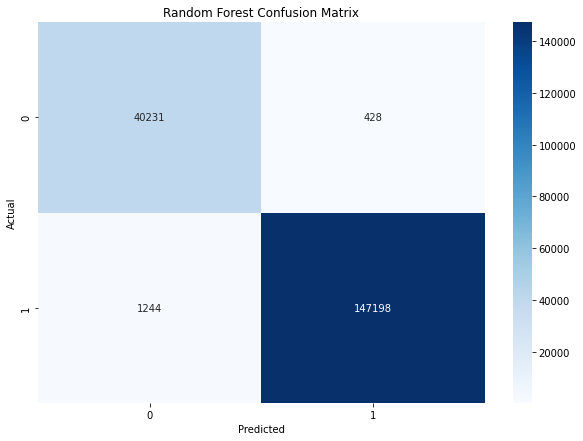

In [50]:
# Plot Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [52]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)

In [53]:
roc_auc_rf

0.9905465238983506

In [55]:
# Feature Importance
feature_importance_rf = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importances (Random Forest):")
print(feature_importance_rf)

Feature Importances (Random Forest):
rfm_score                        0.447841
frequency                        0.144631
monetary_value                   0.094659
price                            0.075714
num_orders                       0.029754
                                   ...   
payment_installments_curitiba    0.000000
payment_type_93218               0.000000
payment_type_81230               0.000000
payment_type_73.42               0.000000
customer_state_4/26/2018 3:25    0.000000
Length: 102, dtype: float64


In [57]:
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

In [58]:
# Train a Decision Tree classifier on the resampled data
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt.fit(X_train_res, y_train_res)

# Make predictions on the test set
y_pred_dt = clf_dt.predict(X_test)


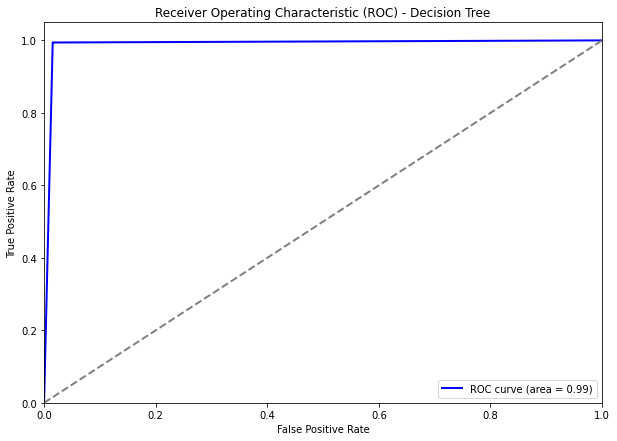

In [59]:
# Plot ROC Curve and calculate AUC for Decision Tree
y_pred_prob_dt = clf_dt.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_prob_dt)
roc_auc_dt = roc_auc_score(y_test, y_pred_prob_dt)

plt.figure(figsize=(10, 7))
plt.plot(fpr_dt, tpr_dt, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Decision Tree')
plt.legend(loc="lower right")
plt.show()

Decision Tree Classifier
[[ 40024    635]
 [   914 147528]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     40659
           1       1.00      0.99      0.99    148442

    accuracy                           0.99    189101
   macro avg       0.99      0.99      0.99    189101
weighted avg       0.99      0.99      0.99    189101



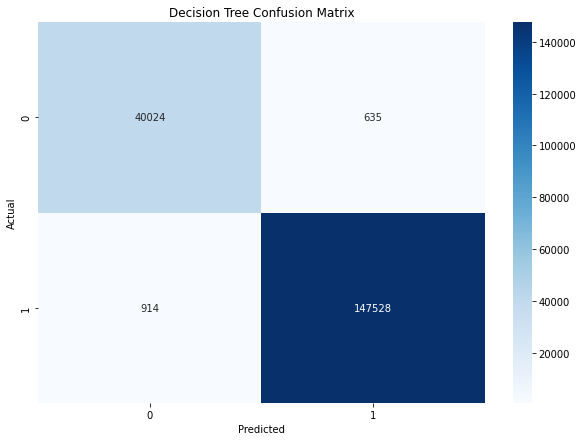

In [61]:
# Make predictions on the test set
y_pred_dt = clf_dt.predict(X_test)

# Evaluate the Decision Tree model
print("Decision Tree Classifier")
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

# Plot Confusion Matrix for Decision Tree
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

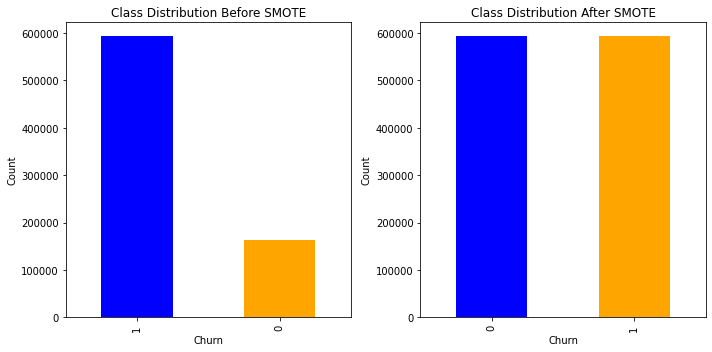

In [62]:
# Visualize class distribution before SMOTE
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
y_train.value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Class Distribution Before SMOTE')
plt.xlabel('Churn')
plt.ylabel('Count')

# Visualize class distribution after SMOTE
plt.subplot(1, 2, 2)
y_train_res.value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Class Distribution After SMOTE')
plt.xlabel('Churn')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [63]:
# Train a Decision Tree classifier on the original data
clf_dt_original = DecisionTreeClassifier(random_state=42)
clf_dt_original.fit(X_train, y_train)

# Predict probabilities on the test set
y_pred_prob_dt_original = clf_dt_original.predict_proba(X_test)[:, 1]

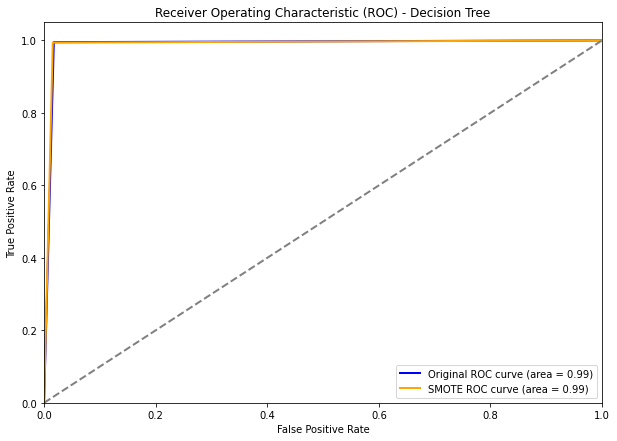

In [64]:
# Calculate ROC curves and AUC scores
fpr_dt_original, tpr_dt_original, _ = roc_curve(y_test, y_pred_prob_dt_original)
roc_auc_dt_original = roc_auc_score(y_test, y_pred_prob_dt_original)

fpr_dt_smote, tpr_dt_smote, _ = roc_curve(y_test, y_pred_dt)
roc_auc_dt_smote = roc_auc_score(y_test, y_pred_dt)

# Plot ROC curves
plt.figure(figsize=(10, 7))
plt.plot(fpr_dt_original, tpr_dt_original, color='blue', lw=2, label='Original ROC curve (area = %0.2f)' % roc_auc_dt_original)
plt.plot(fpr_dt_smote, tpr_dt_smote, color='orange', lw=2, label='SMOTE ROC curve (area = %0.2f)' % roc_auc_dt_smote)
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Decision Tree')
plt.legend(loc="lower right")
plt.show()